In [ ]:
import random
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# replace with your own file path
filePath = '/content/drive/My Drive/Colab Notebooks/BankProblem.txt'

In [ ]:
# get meta data from the txt file
def getMetaData(filePath):
    with open(filePath, 'r') as f: lines = f.readlines()
    capacity, bags, weights, values = 0, [], [], []
    for line in lines:
        if line.strip().split()[0] == 'security':
            capacity = int(line.strip().split()[-1])
        if line.strip().split()[0] == 'bag':
            bags.append(int(line.strip().split()[-1][:-1]))
        if line.strip().split()[0] == 'weight:':
            weights.append(float(line.strip().split()[-1]))
        if line.strip().split()[0] == 'value:':
            values.append(int(line.strip().split()[-1]))
    return capacity, bags, weights, values

capacity, bags, weights, values = getMetaData(filePath)
population = {bags[i]: [weights[i], values[i]] for i in range(len(weights))}  # population - {bag: [weight, value]}
print(population)

# dataframe visualise population
data = {'weights': weights, 'values': values}
dataDF = pd.DataFrame(data)
dataDF.index += 1  # index start from 1
dataDF.head(5)

{1: [9.4, 57], 2: [7.4, 94], 3: [7.7, 59], 4: [7.4, 83], 5: [2.9, 82], 6: [1.1, 91], 7: [7.3, 42], 8: [9.0, 84], 9: [8.1, 85], 10: [7.2, 18], 11: [7.5, 94], 12: [4.2, 18], 13: [4.4, 31], 14: [5.7, 27], 15: [2.0, 31], 16: [2.0, 42], 17: [9.9, 58], 18: [9.5, 57], 19: [5.2, 55], 20: [7.1, 97], 21: [6.8, 79], 22: [1.6, 10], 23: [7.9, 34], 24: [3.0, 100], 25: [1.6, 98], 26: [9.0, 45], 27: [2.1, 19], 28: [4.9, 77], 29: [7.0, 56], 30: [6.8, 25], 31: [7.7, 60], 32: [2.1, 22], 33: [8.4, 84], 34: [1.9, 89], 35: [6.5, 12], 36: [3.8, 46], 37: [2.5, 20], 38: [4.3, 85], 39: [9.9, 42], 40: [8.5, 94], 41: [8.0, 20], 42: [1.0, 65], 43: [4.4, 27], 44: [2.6, 34], 45: [2.1, 27], 46: [7.4, 91], 47: [1.5, 17], 48: [2.2, 56], 49: [8.1, 23], 50: [7.9, 89], 51: [1.5, 18], 52: [3.5, 11], 53: [2.4, 91], 54: [1.6, 79], 55: [4.3, 14], 56: [7.5, 99], 57: [2.5, 45], 58: [7.6, 73], 59: [4.8, 81], 60: [6.5, 96], 61: [1.5, 51], 62: [2.3, 96], 63: [1.0, 63], 64: [8.1, 40], 65: [8.1, 93], 66: [6.7, 87], 67: [5.8, 71], 68

,weights,values
1,9.4,57
2,7.4,94
3,7.7,59
4,7.4,83
5,2.9,82


In [ ]:
class EA:
    def __init__(self, population):
        self.population = population
    
    def initPopulation(self, capacity, populationSize=100):
        """
        randomly init population which the total weight is less than capacity
        :params capacity: int
        :params populationSize: number of population (notice: once the size larger than a specific number, probably not all the popualtion will be used)
        :returns self.population: dict - the population after init
        """
        totalWeight = 0
        randomNums = random.sample(range(1, len(self.population)+1), populationSize)  # random generate populationSize numbers from range(1, 101)
        for i, num in enumerate(randomNums):
            weight = self.population[num][0]
            totalWeight += weight
            if totalWeight > capacity: break
            if i == len(randomNums)-1 and totalWeight <= capacity: i += 1  # if the total weight less than the capacity, the index of i need to update
        # update population
        p = {num: [self.population[num][0], self.population[num][1]] for num in randomNums[:i]}
        self.population = p
        return self.population
    
    def getFitness(self):
        """get total fitness of the population"""
        fitness = 0  #define fitness function as the sum of values
        for v in self.population.values():
            value = v[1]
            fitness += value
        # print('The fitness is: {}'.format(fitness))
        return fitness
    
    def tournamentSelection(self, tournamentSize=2):
        """
        Randomly choose a chromosome
        :params tournamentSize: how many individual will be choose randomly to compare (the default param 2 is correspond to binary tournament)
        :params best: the key of the best fitness individual
        """
        best = None
        for _ in range(tournamentSize):
            # randomly select a chromosome
            i = random.randint(0, len(self.population)-1)
            k = list(self.population)[i]  # key of the individual
            value = self.population[k][1]  # value of the individual 
            # print('key is: {}, value is: {}'.format(k, value))
            if not best or value > self.population[best][1]:
                best = k
        return best
    
    def crossover(self, p1, p2):
        """
        single point crossover between p1 and p2 - assuming value is chromosome
        :params: p1, p2: the key of the individual (int)
        :returns: c1, c2: the value of p1, p2 after crossover (int)
        """
        length = max(len(str(self.population[p1][1])), len(str(self.population[p2][1])))  # find the max length between p1.value and p2.value
        pointer = random.randint(1, length-1)  # e.g. 1|2|3 the "|" is the pointer (range from 1 to n-1) which is smaller than the length of chromosome
        # swap the genes after pointer
        c1 = str(self.population[p1][1])[:pointer] + str(self.population[p2][1])[pointer:]
        c2 = str(self.population[p2][1])[:pointer] + str(self.population[p1][1])[pointer:]
        return [int(c1), int(c2)]  # issue - how to deal with chromosomes with different length (what strategy)?
    
    def mutation(self, c, mutationRate=3):
        """
        M-gene mutation
        :params c: the value of an individual
        :params mutationRate: int - how many times of single-gene mutation
        :returns e: the value after c mutate
        """
        c = str(c)
        for _ in range(mutationRate):
                pointer = random.randint(0, len(str(c))-1)  # pointer is used to decide which character(gene) to mutate
                candidate = random.randint(0, 9)  # what will be replaced - range(0, 10)
                c = c[:pointer] + str(candidate) + c[pointer+1:]  # mutation
        return int(c)
    
    def weakestReplace(self, c):
        """
        Replace First Weakest which is used the Replacement II method that mentioned in Lecture slide
        :params c: the value of a individual
        """
        for k, v in self.population.items():
            value = v[1]
            if c > value:
                # print('the replaced key is {}'.format(k))
                # print('replace {} to {}'.format(value, c), end='\n\n')
                self.population[k][1] = c
                return
        # print('nothing to replace', end='\n\n')


In [ ]:
epoch, f = 0, []
TC = 10000  # Termination Criterion
random.seed(3)  # random seed can be changed for different trail - notice: some seed will cause endless loop

"""the parameters below can be changed to optimaise the performance"""
populationSize = 100  # as much as possible - range(0, 100)
tournamentSize = 2  # as much as possible - range(1, 100)
mutationRate = 3  # 玄学参数 - 个人感觉在range(1, 3)较好


e = EA(population)
pop = e.initPopulation(capacity, populationSize)  # init population

fitness = e.getFitness()  # fitness evaluation
f.append(fitness)

loopTime, last = 0, None  # are used to record the number of invalid loop
while fitness <= TC:
    print('epoch: {}    fitness: {}'.format(epoch, fitness))

    parents = [e.tournamentSelection(tournamentSize) for _ in range(2)]  # binary tournament select two parents
    childrenValue = e.crossover(parents[0], parents[1])  # parents crossover
    childrenValue = [e.mutation(child, mutationRate) for child in childrenValue]  # children mutation
    for child in childrenValue:  # weakest replacement
        e.weakestReplace(child)
    fitness = e.getFitness()  # fitness evaluation

    # raise ERR when the algorithm is already optimal but not achieve the termination criterion
    loopTime = loopTime + 1 if fitness == last else 0
    last = fitness
    if loopTime >= 100:
        raise RuntimeError('This evolutionary algorithm is already optimal, but it has not reached the termination criterion, different random seed can be trialed')
    
    f.append(fitness)
    epoch += 1

print('epoch: {}    fitness: {}'.format(epoch, fitness) + '\nEND')

epoch: 0    fitness: 2730
epoch: 1    fitness: 2747
epoch: 2    fitness: 3681
epoch: 3    fitness: 3725
epoch: 4    fitness: 3726
epoch: 5    fitness: 3773
epoch: 6    fitness: 3789
epoch: 7    fitness: 3827
epoch: 8    fitness: 3829
epoch: 9    fitness: 4647
epoch: 10    fitness: 4674
epoch: 11    fitness: 4706
epoch: 12    fitness: 5065
epoch: 13    fitness: 5109
epoch: 14    fitness: 5156
epoch: 15    fitness: 5648
epoch: 16    fitness: 6255
epoch: 17    fitness: 6276
epoch: 18    fitness: 6287
epoch: 19    fitness: 6310
epoch: 20    fitness: 6893
epoch: 21    fitness: 7114
epoch: 22    fitness: 7123
epoch: 23    fitness: 7151
epoch: 24    fitness: 7288
epoch: 25    fitness: 7315
epoch: 26    fitness: 7326
epoch: 27    fitness: 7482
epoch: 28    fitness: 7496
epoch: 29    fitness: 7502
epoch: 30    fitness: 7784
epoch: 31    fitness: 7790
epoch: 32    fitness: 7803
epoch: 33    fitness: 7848
epoch: 34    fitness: 7855
epoch: 35    fitness: 7864
epoch: 36    fitness: 8103
epoch: 37  

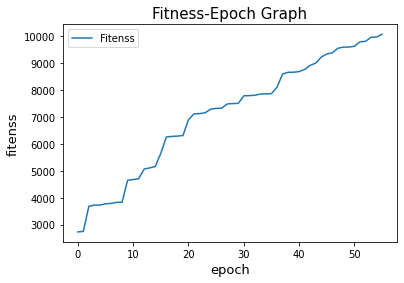

In [ ]:
# visualise the fitness correpsond to epoch
X, Y = range(epoch+1), f[:]
plt.rc('figure')
plt.plot(X, Y, label = 'Fitenss')
plt.xlabel('epoch',fontsize = 13)
plt.ylabel('fitenss',fontsize = 13)
plt.title('Fitness-Epoch Graph',fontsize=15) 
plt.legend()
plt.show()